In [98]:
#Importing all the required libraries
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectFromModel
# from sklearn.model_selection import learning_curve
from sklearn import tree
from sklearn import svm
from sklearn.metrics import f1_score
import warnings
warnings.simplefilter('ignore')

In [99]:
#importing the dataset
df1 = pd.read_csv("train_values.csv")
df2 = pd.read_csv("train_labels.csv")

In [100]:
#merging datasets:
df_merged = pd.merge(df1,df2)

In [101]:
df_merged = df_merged.sample(frac = 0.1)

In [102]:
#checking the dataframe
df_merged.head(3)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
90117,549563,20,517,6489,2,20,10,7,t,w,...,0,0,0,0,0,0,0,0,0,2
3592,1006428,9,772,12334,1,5,3,2,t,r,...,0,0,0,0,0,0,0,0,0,2
50777,619208,10,1207,3095,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2


# 1

In [103]:
#checking for null values:
df_merged.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [104]:
#checking the types of variables:
df_merged.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [105]:
#reindexing to make the next steps easier
df_merged = df_merged.reindex(columns = ['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage','count_families',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other',
       'damage_grade'])

In [106]:
#changing categorical datatypes to category
df_merged.iloc[:,9:40] = df_merged.iloc[:,9:40].astype('category')

In [107]:
df_merged.dtypes

building_id                                  int64
geo_level_1_id                               int64
geo_level_2_id                               int64
geo_level_3_id                               int64
count_floors_pre_eq                          int64
age                                          int64
area_percentage                              int64
height_percentage                            int64
count_families                               int64
land_surface_condition                    category
foundation_type                           category
roof_type                                 category
ground_floor_type                         category
other_floor_type                          category
position                                  category
plan_configuration                        category
has_superstructure_adobe_mud              category
has_superstructure_mud_mortar_stone       category
has_superstructure_stone_flag             category
has_superstructure_cement_morta

In [108]:
#checking correlation
c = df_merged.corr().abs()
c = c[(c > 0.70) & (c < 1.0)]
sort = c.unstack() #unstacking to change the pivot index to column labels
highly_correlated = sort.sort_values(kind="quicksort") # sorting to see the order of correlation between the columns
highly_correlated = highly_correlated.dropna() # to drop the values that have NAN's for total cases column
highly_correlated


count_floors_pre_eq  height_percentage      0.771731
height_percentage    count_floors_pre_eq    0.771731
dtype: float64

Correlation between independent variables more than 0.7 and removing them.

In [109]:
df_merged = df_merged.drop(['count_floors_pre_eq'], axis = 1)

# 2

In [110]:
#changing the percentage values to normal values
df_merged['area_percentage'] = df_merged['area_percentage']/100
df_merged['height_percentage'] = df_merged['height_percentage']/100

In [111]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df_merged.iloc[:,0:38], df_merged.iloc[:,-1],stratify = df_merged['damage_grade'], test_size=0.3)

In [112]:
#checking the split
print(df_merged["damage_grade"].value_counts()/len(df_merged))
print(y_train.value_counts()/len(y_train))
print(y_test.value_counts()/len(y_test))

2    0.574559
3    0.329048
1    0.096393
Name: damage_grade, dtype: float64
2    0.574553
3    0.329076
1    0.096371
Name: damage_grade, dtype: float64
2    0.574572
3    0.328984
1    0.096444
Name: damage_grade, dtype: float64


In [113]:
le = LabelEncoder()

X_train["land_surface_condition"]=le.fit_transform(X_train["land_surface_condition"])
X_test["land_surface_condition"]= le.transform(X_test["land_surface_condition"])

X_train["foundation_type"]=le.fit_transform(X_train["foundation_type"])
X_test["foundation_type"]= le.transform(X_test["foundation_type"])

X_train["roof_type"]=le.fit_transform(X_train["roof_type"])
X_test["roof_type"]= le.transform(X_test["roof_type"])

X_train["ground_floor_type"]=le.fit_transform(X_train["ground_floor_type"])
X_test["ground_floor_type"]= le.transform(X_test["ground_floor_type"])

X_train["other_floor_type"]=le.fit_transform(X_train["other_floor_type"])
X_test["other_floor_type"]= le.transform(X_test["other_floor_type"])

X_train["position"]=le.fit_transform(X_train["position"])
X_test["position"]= le.transform(X_test["position"])

X_train["legal_ownership_status"]=le.fit_transform(X_train["legal_ownership_status"])
X_test["legal_ownership_status"]= le.transform(X_test["legal_ownership_status"])


X_train["plan_configuration"]=le.fit_transform(X_train["plan_configuration"])
X_test["plan_configuration"]= le.transform(X_test["plan_configuration"])






In [114]:
#Scaling the numerical features
categorical_columns = ['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']

X_train_1 = X_train[categorical_columns]
X_test_1 = X_test[categorical_columns]

scaler = StandardScaler()
standardized_numeric_data = scaler.fit_transform(X_train.drop(columns=categorical_columns))
X_train_final = np.concatenate((standardized_numeric_data,np.array(X_train_1)),axis=1)
standardized_numeric_data = scaler.transform(X_test.drop(columns=categorical_columns))
X_test_final = np.concatenate((standardized_numeric_data,np.array(X_test_1)),axis=1)



# 3 Modelling

In [115]:
#model fitting
svc = svm.SVC(class_weight= 'balanced')
svc.fit(X_train_final, y_train)

SVC(class_weight='balanced')

In [116]:
y_predict = svc.predict(X_test_final)

In [117]:
confusion_matrix(y_test,y_predict)

array([[ 507,  115,  132],
       [ 699, 1707, 2086],
       [ 101,  582, 1889]], dtype=int64)

In [118]:
accuracy = accuracy_score(y_test,y_predict)
print(accuracy)

0.5248145305704783


In [119]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_predict)
print(report)


              precision    recall  f1-score   support

           1       0.39      0.67      0.49       754
           2       0.71      0.38      0.50      4492
           3       0.46      0.73      0.57      2572

    accuracy                           0.52      7818
   macro avg       0.52      0.60      0.52      7818
weighted avg       0.60      0.52      0.52      7818



In [120]:
f1_score(y_test, y_predict, average='micro')

0.5248145305704783

Choosing f1 score because it gives a good measure between precision and recall. F1 score is better than accuracy as it accounts for label imbalances.

In [121]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'C':[0.1,0.2,0.5,1,10],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':['scale','auto'],
'max_iter':[1000,5000,8000]}
random_search = RandomizedSearchCV(svc,param_distributions = param_grid)
random_search.fit(X_train_final,y_train)

RandomizedSearchCV(estimator=SVC(class_weight='balanced'),
                   param_distributions={'C': [0.1, 0.2, 0.5, 1, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'max_iter': [1000, 5000, 8000]})

In [122]:
random_search.best_estimator_

SVC(C=0.5, class_weight='balanced', kernel='poly', max_iter=8000)

In [127]:
optimizedSVC = svm.SVC(C=0.5, kernel='poly', max_iter=8000)
optimizedSVC.fit(X_train_final,y_train)

SVC(C=0.5, kernel='poly', max_iter=8000)

We can tune 
'C'- Regularization parameter, which helps us to deal with overfitting. 

kernel - Specifies the type of kernel, which will help in mapping the data in high dimensional space non-linearly.

gamma - kernel coefficient for kernels.

max_iter - it helps the model to fix the maximum iterations it can do till the convergence

In [128]:
y_predict = optimizedSVC.predict(X_test_final)
f1_score(y_test, y_predict, average='micro')

0.5892811460731645

In [129]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_predict)
print(accuracy)

0.5892811460731645


In [130]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_predict)
print(report)


              precision    recall  f1-score   support

           1       0.66      0.22      0.33       754
           2       0.59      0.96      0.73      4492
           3       0.57      0.05      0.09      2572

    accuracy                           0.59      7818
   macro avg       0.60      0.41      0.38      7818
weighted avg       0.59      0.59      0.48      7818



F1 score and accuracy has changed by a little

In [185]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, scoring=None,
                        n_jobs=None,shuffle = None,train_sizes=np.linspace(.1, 1.0, 10)):
    
    plt.title(title)
    
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, scoring=scoring,cv=cv, n_jobs=n_jobs, 
                       train_sizes=train_sizes,shuffle = True,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    
    # Plot learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")

    return plt,train_sizes, train_scores, test_scores, fit_times

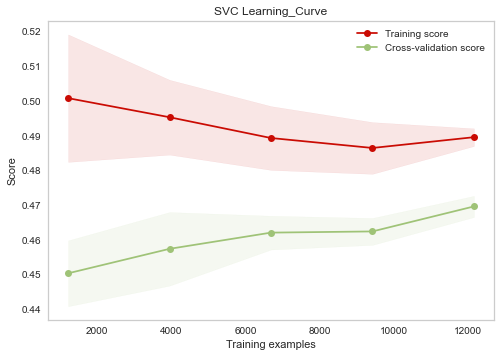

In [186]:
plt,train_sizes, train_scores, test_scores, fit_times = plot_learning_curve(optimizedSVC,'SVC Learning_Curve', X_train_final, y_train, cv = 3,scoring = 'f1_weighted')
plt.show()

SVC Learning curve shows that the model fit is not bad as training and cross validation scores have reached together. If we can train them on more examples, the f1 score will improve

In [161]:
Decision_Tree = tree.DecisionTreeClassifier()
Decision_Tree.fit(X_train_final, y_train)


DecisionTreeClassifier()

In [111]:
y_predict = Decision_Tree.predict(X_test_final)
f1_score(y_test, y_predict, average='micro')

0.5635712458429266

In [116]:
accuracy = accuracy_score(y_test,y_predict)
print(accuracy)

0.5635712458429266


In [117]:
report = classification_report(y_test,y_predict)
print(report)


              precision    recall  f1-score   support

           1       0.37      0.39      0.38       384
           2       0.64      0.62      0.63      2212
           3       0.51      0.51      0.51      1313

    accuracy                           0.56      3909
   macro avg       0.50      0.51      0.51      3909
weighted avg       0.57      0.56      0.56      3909



In [124]:
param_grid = {'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[100,1000,1500,2000,3500,4000]}
random_search = RandomizedSearchCV(Decision_Tree,param_distributions = param_grid)
random_search.fit(X_train_final,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [100, 1000, 1500, 2000,
                                                      3500, 4000],
                                        'splitter': ['best', 'random']})

In [125]:
random_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=1500, splitter='random')

In [135]:
Optimized_Decision_Tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 1500, splitter = 'random')
Optimized_Decision_Tree.fit(X_train_final, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=1500, splitter='random')

In [136]:
y_predict = Optimized_Decision_Tree.predict(X_test_final)
f1_score(y_test, y_predict, average='micro')


0.5738040419544641

In [137]:
accuracy = accuracy_score(y_test,y_predict)
print(accuracy)

0.5738040419544641


In [123]:
report = classification_report(y_test,y_predict)
print(report)


              precision    recall  f1-score   support

           1       0.16      0.01      0.02       384
           2       0.62      0.91      0.74      2212
           3       0.71      0.35      0.47      1313

    accuracy                           0.63      3909
   macro avg       0.50      0.42      0.41      3909
weighted avg       0.60      0.63      0.58      3909



After random search, the f1 score has increased by quite a bit. Explaination of hyper-parameters:

Criterion explains how the split of the node is done(either gini or entropy score). 

Max-depth indicates the depth of the tree, tuning this might help in achieving a better f1 score


Decision tree performed better after hyper-parameter tuning as the f1 score for decision tree is 0.5738 and for SVM is 0.573. It  might show significant difference if we provide more training examples or increase training data